In [61]:
import pandas as pd
import requests
from os.path import exists

# Função para baixar os dados
def download_data():
    url = 'https://asloterias.com.br/download_excel.php'

    headers = {
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
        'Content-Type': 'application/x-www-form-urlencoded',
        'Referer': 'https://asloterias.com.br/download-todos-resultados-mega-sena',
        'Sec-Fetch-Dest': 'document',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-Site': 'same-origin',
        'Upgrade-Insecure-Requests': '1'
    }

    data = {
        'l': 'ms',
        't': 't',
        'o': 'c',
        'f1': '',
        'f2': ''
    }

    # Envia uma solicitação POST para a URL especificada
    response = requests.post(url, headers=headers, data=data)

    # Salva o conteúdo da resposta em um arquivo
    with open('megasena_data.xlsx', 'wb') as f:
        f.write(response.content)

# Função para ler os dados
def read_data():
    # Lê os dados do arquivo Excel, pulando as primeiras 6 linhas
    return pd.read_excel('megasena_data.xlsx', skiprows=6)

# Função principal
def main():
    # Verifica se o arquivo já foi baixado
    file_exists = exists('megasena_data.xlsx')

    if not file_exists:
        # Se o arquivo não existe, baixa os dados
        download_data()
        megasena_data = read_data()
        print('Dados baixados')
    else:
        # Se o arquivo existe, lê os dados
        megasena_data = read_data()
        print('Dados carregados')

    # Exibe as primeiras 10 linhas dos dados
    print(megasena_data.head(10))

if __name__ == "__main__":
    main()

Dados carregados
   Concurso        Data  bola 1  bola 2  bola 3  bola 4  bola 5  bola 6
0      2675  13/01/2024       1      26      31      34      42      45
1      2674  11/01/2024       8      14      15      21      23      46
2      2673  09/01/2024       4      27      35      45      52      56
3      2672  06/01/2024      10      13      20      40      43      56
4      2671  04/01/2024      16      19      43      53      57      58
5      2670  31/12/2023      21      24      33      41      48      56
6      2669  16/12/2023       4       7      16      35      46      54
7      2668  14/12/2023       1      27      30      41      46      57
8      2667  12/12/2023       1       4       8      21      46      51
9      2666  09/12/2023       5      25      29      30      43      47


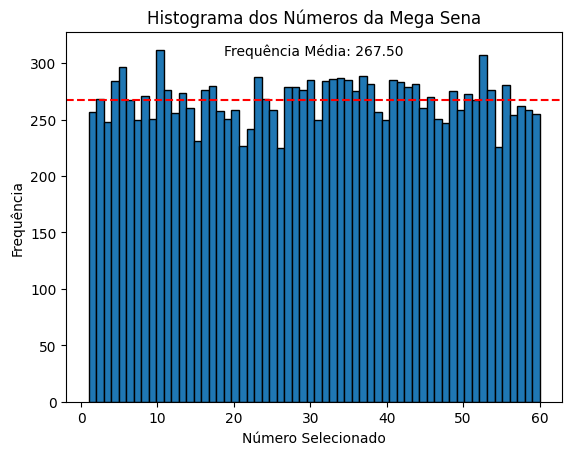

In [62]:
numeros_mega_sena = megasena_data[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']].to_numpy(copy=True).ravel()

# Criando o histograma
hist, bin_edges, _ = plt.hist(
    numeros_mega_sena,
    bins=60,
    edgecolor='k',
)

# Calculando a frequência média
frequencia_media = hist.mean()

# Adicionando uma linha pontilhada vermelha representando a frequência média
plt.axhline(frequencia_media, c='r', ls='--')

# Adicionando título e rótulos aos eixos
plt.title(f'Histograma dos Números da Mega Sena')
plt.xlabel('Número Selecionado')
plt.ylabel('Frequência')

# Adicionando texto informativo sobre a frequência média
plt.text(
    x=0.5, y=0.95,
    s=f'Frequência Média: {frequencia_media:.2f}',
    ha='center', va='center',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5')
)

# Exibindo o gráfico
plt.show()

In [63]:
# Seleciona as colunas com os números da Mega Sena
games = megasena_data.iloc[:, 2:]

# Nomeia as colunas para representar as posições dos números
positions = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
games.columns = positions

# Exibe as primeiras linhas do DataFrame para confirmar as alterações
games.head()

,position_1,position_2,position_3,position_4,position_5,position_6
0,1,26,31,34,42,45
1,8,14,15,21,23,46
2,4,27,35,45,52,56
3,10,13,20,40,43,56
4,16,19,43,53,57,58


In [64]:
# Seleciona as colunas de data e número do jogo
info = megasena_data.iloc[:, 0:2]

# Exibe as primeiras linhas do DataFrame para visualizar as informações
info.head()

,Concurso,Data
0,2675,13/01/2024
1,2674,11/01/2024
2,2673,09/01/2024
3,2672,06/01/2024
4,2671,04/01/2024


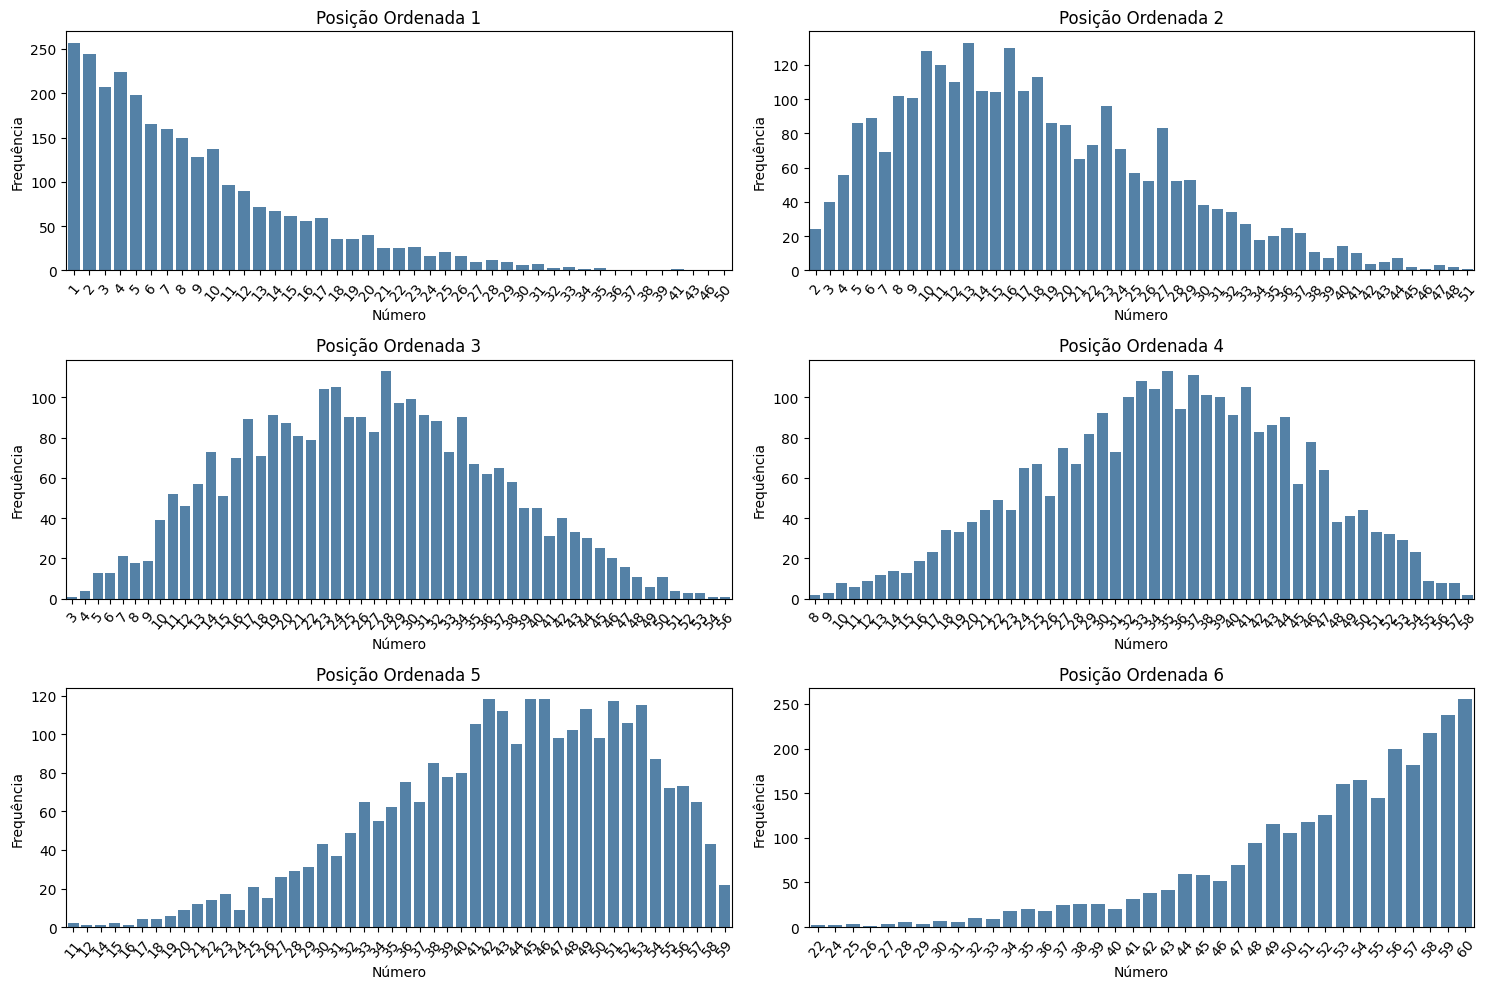

In [67]:
# Lista para armazenar as posições ordenadas
sorted_positions = []

# Loop para iterar sobre as posições e contar a frequência dos números
for i, position in enumerate(positions):
    sorted_positions.append(games[position].value_counts())

# Criação do subplot para exibir os gráficos ordenados
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))  # 15, 10 -> largura, altura
axs = axs.flatten()

# Loop para plotar os gráficos de barras para cada posição
for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], color="steelblue")  # Substitui o uso de palette por color
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show();

In [68]:
numeros_sorteio = games.to_numpy()

contagem_numeros = {}

# Itera sobre a coluna 'numeros_sorteio' e conta as ocorrências de cada número
for numeros_lista in numeros_sorteio:
    for numero in numeros_lista:
        if numero in contagem_numeros:
            contagem_numeros[numero] += 1
        else:
            contagem_numeros[numero] = 1

# Cria um DataFrame com as contagens ordenadas por frequência
df_contagem = pd.DataFrame(list(contagem_numeros.items()), columns=['Numero', 'Contagem']).sort_values(by='Contagem', ascending=False).reset_index(drop=True)

# Calcula o total de sorteios realizados
total_sorteios = df_contagem['Contagem'].sum()

# Calcula a probabilidade de cada número ser sorteado
df_contagem['Probabilidade'] = df_contagem['Contagem'] / total_sorteios * 100

# Calcula a chance percentual de cada número não ser sorteado
df_contagem['Chance_%'] = (100 - df_contagem['Probabilidade'])

# Cria um novo DataFrame com os números e suas maiores chances de não serem sorteados
df_maior_chance = df_contagem[['Numero','Chance_%']].sort_values(by='Chance_%', ascending=False).reset_index(drop=True)

In [69]:
df_maior_chance

,Numero,Chance_%
0,26,98.598131
1,55,98.591900
2,21,98.585670
3,15,98.560748
4,22,98.492212
5,48,98.461059
6,3,98.454829
7,40,98.442368
8,7,98.442368
9,31,98.442368


In [41]:
# Função para gerar uma lista de 6 números únicos de 1 a 60
def gerar_lista():
    return random.sample(range(1, 61), 6)

# Gerar 100 listas de 6 números
listas = [gerar_lista() for _ in range(100)]


In [57]:
resultados = []

# Calcular a média para cada sublista e adicionar à nova lista
for sublista in listas:
    valores_encontrados = df_maior_chance[df_maior_chance['Numero'].isin(sublista)]['Chance_%']
    media_chances = valores_encontrados.mean()
    resultados.append((sublista, media_chances))

# Criar um DataFrame a partir da lista de tuplas
colunas = ['Lista Original', 'Média das Chance_%']
df_resultados = pd.DataFrame(resultados, columns=colunas)

# Ordenar o DataFrame pela maior média das "Chance_%"
df_resultados = df_resultados.sort_values(by='Média das Chance_%', ascending=False)

# Imprimir o DataFrame ordenado
print(df_resultados)

              Lista Original  Média das Chance_%
69  [55, 39, 25, 26, 21, 15]           98.520249
28  [15, 45, 49, 31, 58, 26]           98.439252
45  [31, 46, 39, 15, 49, 55]           98.433022
32   [12, 3, 21, 18, 49, 48]           98.430945
98    [9, 12, 57, 8, 39, 26]           98.427830
..                       ...                 ...
9   [20, 37, 30, 35, 33, 24]           98.263759
57    [59, 5, 58, 42, 6, 53]           98.260644
15  [30, 49, 38, 42, 43, 17]           98.251298
73  [22, 56, 44, 10, 30, 35]           98.248183
11  [38, 23, 51, 41, 44, 56]           98.244029

[100 rows x 2 columns]


In [58]:
#importar resultados para arquivo JSON
df_resultados.to_json('resultados.json', orient='records', lines=True)